In [10]:
#import ALL THE THINGS
from IPython.core import display as ICD

import numpy as np
import numpy.lib.recfunctions as rf
import pandas as pd

import matplotlib.pyplot as plt
import mpld3

from ema_workbench import (load_results, ema_logging)
from ema_workbench.analysis import prim
from ema_workbench.analysis import cart

ema_logging.log_to_stderr(ema_logging.INFO)

<Logger EMA (DEBUG)>

# Run PRIM Analysis on Policy Based Model

By running PRIM on the model that has been adjusted to include our recommended adaptive policy plan, we can determine how effective that plan is and where there continue to be gaps in the plan that needs further attention.   

This script accepts an already generated output set, which can be built in the RunExperiments notebook. For the purposes of running this script, all results files can be found in the `./data/` directory. 

### Targets
The targets will be the same as in `02_Scenario_Discovery.ipynb`

* Infectious population > 20% 
* Deceased population > 10%

### Parameters
The key parameters in PRIM analysis are the threshold of coverage and the peeling alpha: 

**Threshold**: The minimum threshold of coverage (how many of the relevant data sets are inside the box) that the algorithm should meet before stopping. In our case, the threshold we used is 0.8, or 80% coverage.

**Peeling Alpha**: The peeling alpha refers to how much data is "peeled off" over each iteration of the algorithm. We left the peeling trajectory at the default 0.05 for this run. 

In [11]:
infectious_max = 0.2
deceased_max = 0.1
population = 100000

In [ ]:
# Load results (these can be generated with RunExperiments.ipynb if necessary)
results = load_results('./data/FullModel_LHS_3000.tar.gz')
experiments, outcomes = results

### Cases of interest
Determine the percentage of total cases that fall below the threshold

In [35]:
deceased = outcomes['Deceased population']
infectious = np.max(outcomes['Infectious population'], axis=1)

infectious

#make an empty array of length equal to number of cases 
deceased_threshold = np.zeros(deceased.shape[0])
infectious_threshold = np.zeros(infectious.shape[0])
#if deceased population is higher then 10,000 people, classify as 1 
deceased_threshold[deceased[:, -1] > deceased_max*population] = 1
infectious_threshold[infectious > infectious_max*population] = 1

totalDeceased = np.sum(deceased_threshold)
totalInfectious = np.sum(infectious_threshold)

print('{}% of cases are above the deceased threshold.'.format(int(totalDeceased/len(deceased_threshold)*100)))
print('{}% of cases are above the infectious threshold.'.format(int(totalInfectious/len(infectious_threshold)*100)))

38% of cases are above the deceased threshold.
28% of cases are above the infectious threshold.


# Deceased Analysis

In [4]:
def classifyDeceased(data):
    ooi = 'Deceased population'
    result = data[ooi]
    
    #make an empty array of length equal to number of cases 
    classes = np.zeros(result.shape[0])
    
    #if deceased population is higher then 10,000 people, classify as 1 
    classes[result[:, -1] > deceased_max*population] = 1
    
    return classes

deceased_prim = prim.setup_prim(results, classifyDeceased,  
                           threshold=0.8, threshold_type=1)
box1 = deceased_prim.find_box()

[MainProcess/INFO] 3000 points remaining, containing 1155 cases of interest
[MainProcess/INFO] mean: 1.0, mass: 0.24766666666666667, coverage: 0.6432900432900432, density: 1.0 restricted_dimensions: 3.0


box 1          
                                      min       max
Basic reproduction number         3.23651   4.99997
Case fatality rate               0.177524  0.499887
Implementation Time Public Info   2.00016   4.84828

,coverage,density,mass,res_dim
box 1,0.64329,1.0,0.247667,3.0


In [5]:
box1.show_tradeoff()
mpld3.display()

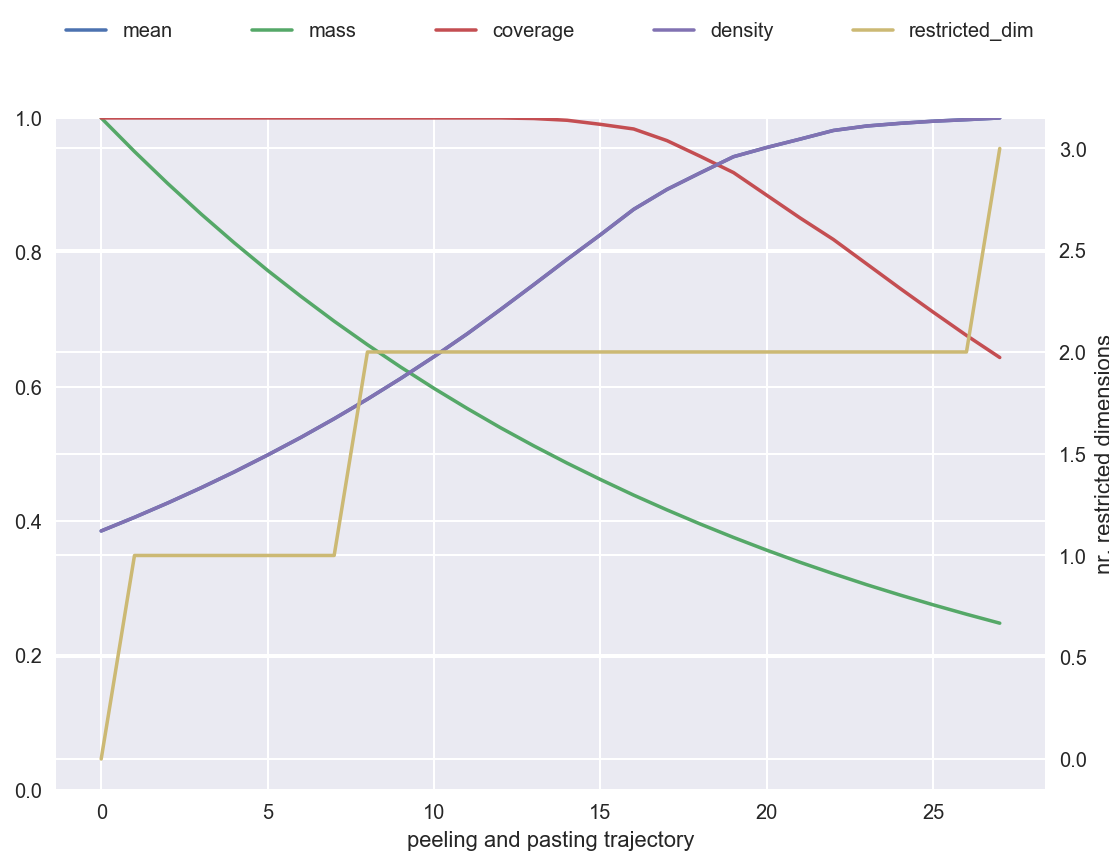

In [6]:
box1.show_ppt()
plt.show()

coverage    0.643290
density     1.000000
mass        0.247667
mean        1.000000
res dim     3.000000
Name: 27, dtype: float64

                                   box 27                         
                                      min       max      qp values
Basic reproduction number        3.236507  4.999969  1.102781e-193
Case fatality rate               0.177524  0.499887  1.269196e-105
Implementation Time Public Info  2.000158  4.848276   1.495302e-01



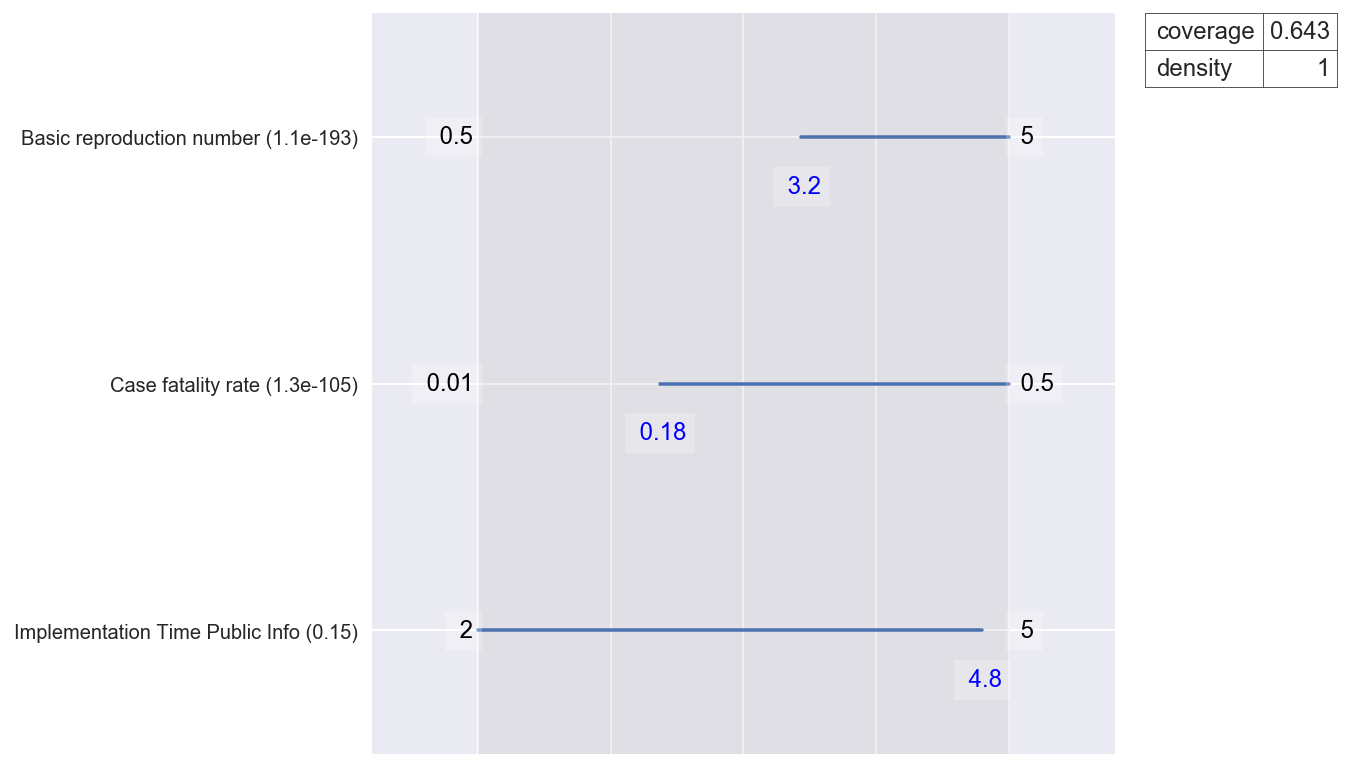

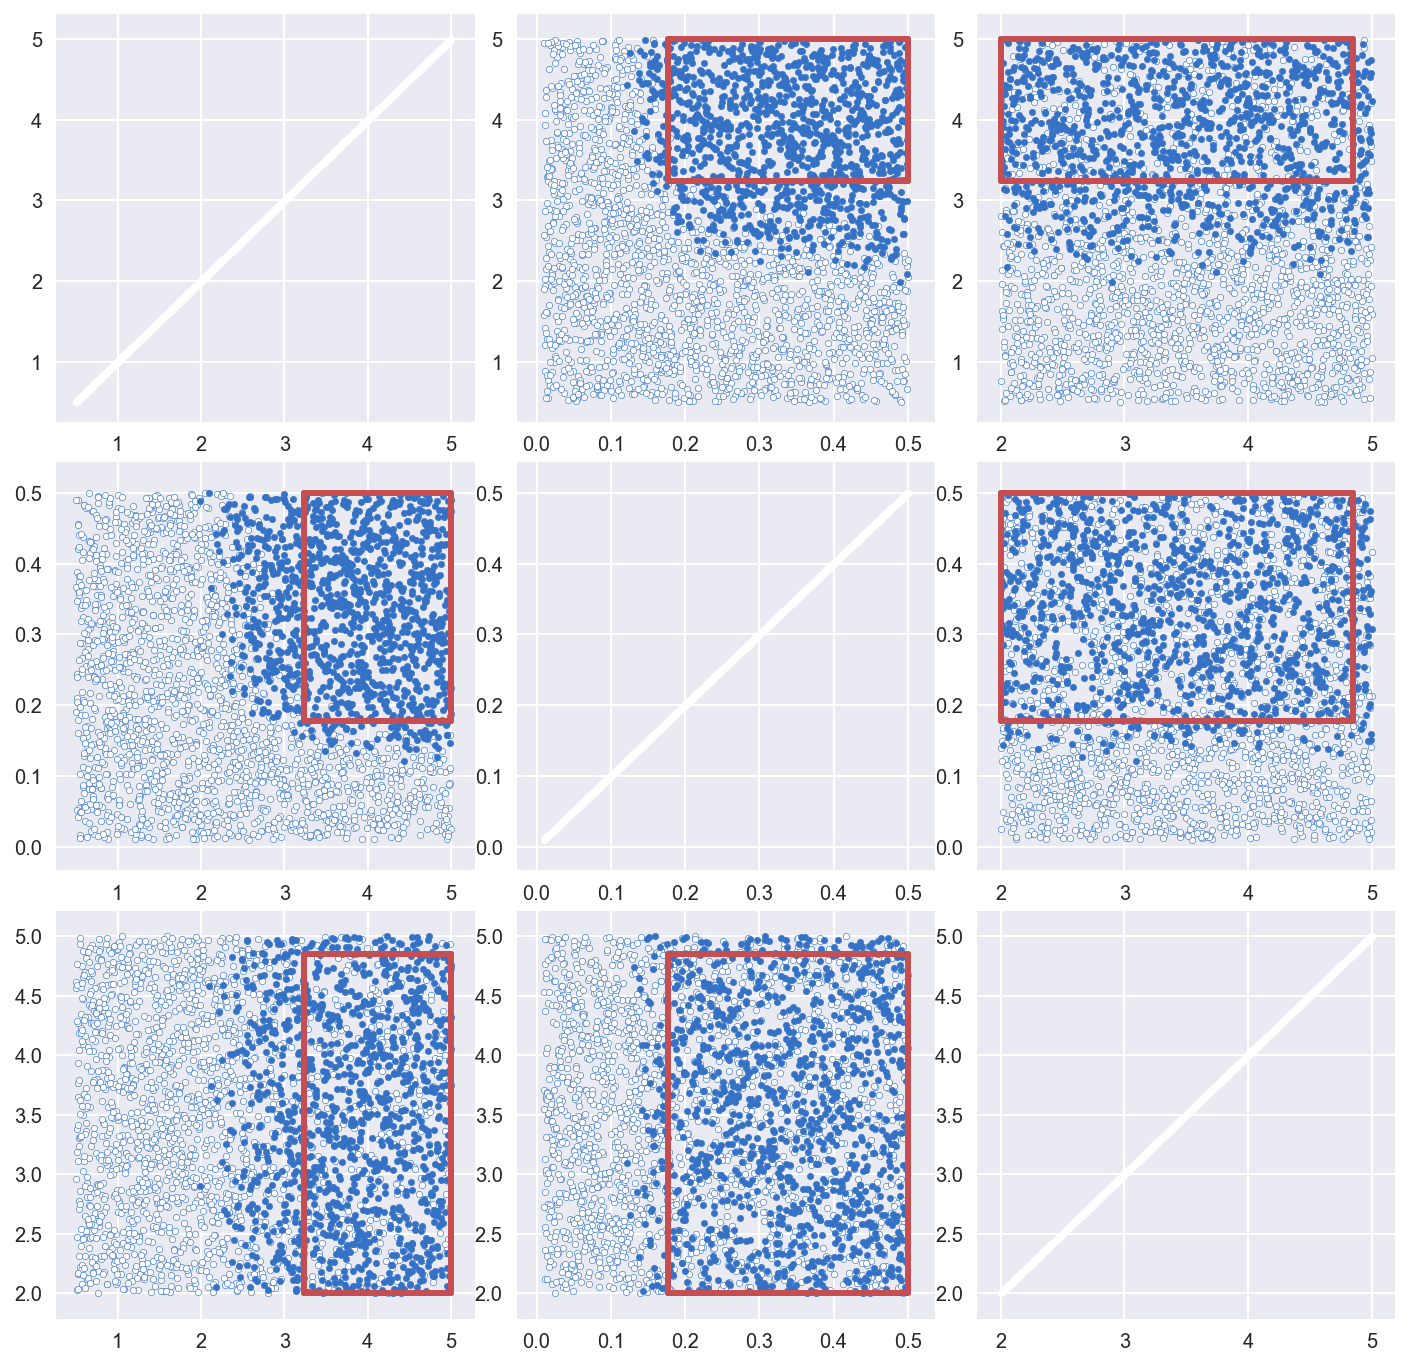

In [7]:
top_box = 27

box1.inspect(top_box)
box1.inspect(top_box, style='graph')

box1.select(top_box)
fig = box1.show_pairs_scatter()
fig.set_size_inches((12,12))
plt.show()
plt.close()

In [15]:
box2 = deceased_prim.find_box()

[MainProcess/INFO] 2257 points remaining, containing 412 cases of interest
[MainProcess/INFO] mean: 1.0, mass: 0.06133333333333333, coverage: 0.15930735930735931, density: 1.0 restricted_dimensions: 10.0


In [17]:
box3 = deceased_prim.find_box()

[MainProcess/INFO] 2073 points remaining, containing 228 cases of interest
[MainProcess/INFO] mean: 0.8181818181818182, mass: 0.051333333333333335, coverage: 0.10909090909090909, density: 0.8181818181818182 restricted_dimensions: 8.0


In [19]:
box4 = deceased_prim.find_box()

[MainProcess/INFO] 1919 points remaining, containing 102 cases of interest
[MainProcess/INFO] box does not meet threshold criteria, value is 0.4840764331210191, returning dump box


In [20]:
ICD.display(deceased_prim.boxes_to_dataframe())
ICD.display(deceased_prim.stats_to_dataframe())

box 1            \
                                                         min       max   
Basic reproduction number                            3.23651   4.99997   
Case fatality rate                                  0.177524  0.499887   
Implementation Time Public Info                      2.00016   4.84828   
Implementation Time Social Distance III              2.00009   3.99974   
Base Transmission Coefficient Medical Care II       0.830019  0.899979   
Base Effort Coefficient Involuntary Immunization     5.00107   9.99962   
Base Effort Coefficient Medical Care II              4.00013    7.9991   
Average infectious period                            7.00312    20.998   
Base Transmission Coefficient Case Isolation        0.730004  0.869983   
Base Effort Coefficient Public Info                  1.00007   1.99976   
Base Recovery Coefficient Medical Care II           0.700028  0.979966   
Base Effort Coefficient Social Distance II           3.00034    5.9998   
Base Effort Coefficient Social Distance III          4.00007   7.99947   
Base Societal Stress Coefficient Voluntary Immu...  0.100047  0.299934   
Base Societal Stress Coefficient Social Distanc...   0.30009  0.799844   

                                                       box 2            \
                                                         min       max   
Basic reproduction number                            2.53348   4.99997   
Case fatality rate                                  0.158046  0.499887   
Implementation Time Public Info                      2.00016   4.99985   
Implementation Time Social Distance III              2.00009   3.99974   
Base Transmission Coefficient Medical Care II       0.830019   0.89652   
Base Effort Coefficient Involuntary Immunization     5.00107   9.59782   
Base Effort Coefficient Medical Care II              4.00013   7.80554   
Average infectious period                            7.00312    16.139   
Base Transmission Coefficient Case Isolation        0.730004  0.869983   
Base Effort Coefficient Public Info                  1.00007    1.9348   
Base Recovery Coefficient Medical Care II           0.717383  0.979966   
Base Effort Coefficient Social Distance II           3.00034    5.9998   
Base Effort Coefficient Social Distance III          4.00007   7.99947   
Base Societal Stress Coefficient Voluntary Immu...  0.100047  0.292084   
Base Societal Stress Coefficient Social Distanc...  0.326744  0.799844   

                                                       box 3            \
                                                         min       max   
Basic reproduction number                            2.65389   4.99997   
Case fatality rate                                  0.143895  0.499887   
Implementation Time Public Info                      2.00016   4.99985   
Implementation Time Social Distance III              2.00009   3.83906   
Base Transmission Coefficient Medical Care II       0.830019  0.899979   
Base Effort Coefficient Involuntary Immunization     5.00107   9.99962   
Base Effort Coefficient Medical Care II              4.47796    7.9991   
Average infectious period                            7.00312   20.4916   
Base Transmission Coefficient Case Isolation        0.745497  0.869983   
Base Effort Coefficient Public Info                  1.00007   1.99976   
Base Recovery Coefficient Medical Care II           0.700028  0.979966   
Base Effort Coefficient Social Distance II           3.00034   5.87177   
Base Effort Coefficient Social Distance III          4.20647   7.99947   
Base Societal Stress Coefficient Voluntary Immu...  0.100047  0.299934   
Base Societal Stress Coefficient Social Distanc...   0.30009  0.799844   

                                                        box 4            
                                                          min       max  
Basic reproduction number                            0.501036   4.99997  
Case fatality rate                                  0.01

,coverage,density,mass,res_dim
box 1,0.643290,1.000000,0.247667,3.0
box 2,0.159307,1.000000,0.061333,10.0
box 3,0.109091,0.818182,0.051333,8.0
box 4,0.088312,0.053153,0.639667,0.0


When comparing the above result with the PRIM analysis from the original model, the relevant uncertainty range for both `Basic reproduction number` and `Case fatality rate` have both been reduced (compare results from 02_Sceario_Discovery). However, along with this, the coverage of the first box is reduced by 15%, meaning more cases of interest are not covered by this uncertainty range than with the original model. 

After the first box, the remainder of the boxes incorporate uncertainties relevant to action properties and do not make any additional significant impact on reducing the uncertainty range of `Basic reproduction number` and `Case fatality rate`.

# Infectious Analysis

In [8]:
def classifyInfectious(data):
    ooi_i = 'Infectious population'
    result_i = np.max(data[ooi_i], axis=1)
    
    #make an empty array of length equal to number of cases 
    classes = np.zeros(result_i.shape[0])
    
    #combine infectious and deceased checks
    classes[(result_i > infectious_max*population)] = 1
    
    return classes

infectious_prim = prim.setup_prim(results, classifyInfectious,  
                           threshold=0.8, threshold_type=1)
box1 = infectious_prim.find_box()

[MainProcess/INFO] 3000 points remaining, containing 854 cases of interest
[MainProcess/INFO] mean: 1.0, mass: 0.163, coverage: 0.572599531615925, density: 1.0 restricted_dimensions: 5.0


box 1          
                                                         min       max
Basic reproduction number                            4.04434   4.99997
Base Societal Stress Coefficient Social Distanc...  0.322753  0.778417
Average incubation time                             0.501261   13.0837
Implementation Time Voluntary Immunization           37.0383   179.978
Base Effort Coefficient Social Distance III          4.00007   7.82224

,coverage,density,mass,res_dim
box 1,0.5726,1.0,0.163,5.0


In [9]:
tradeoff = box1.show_tradeoff()
mpld3.display(tradeoff)

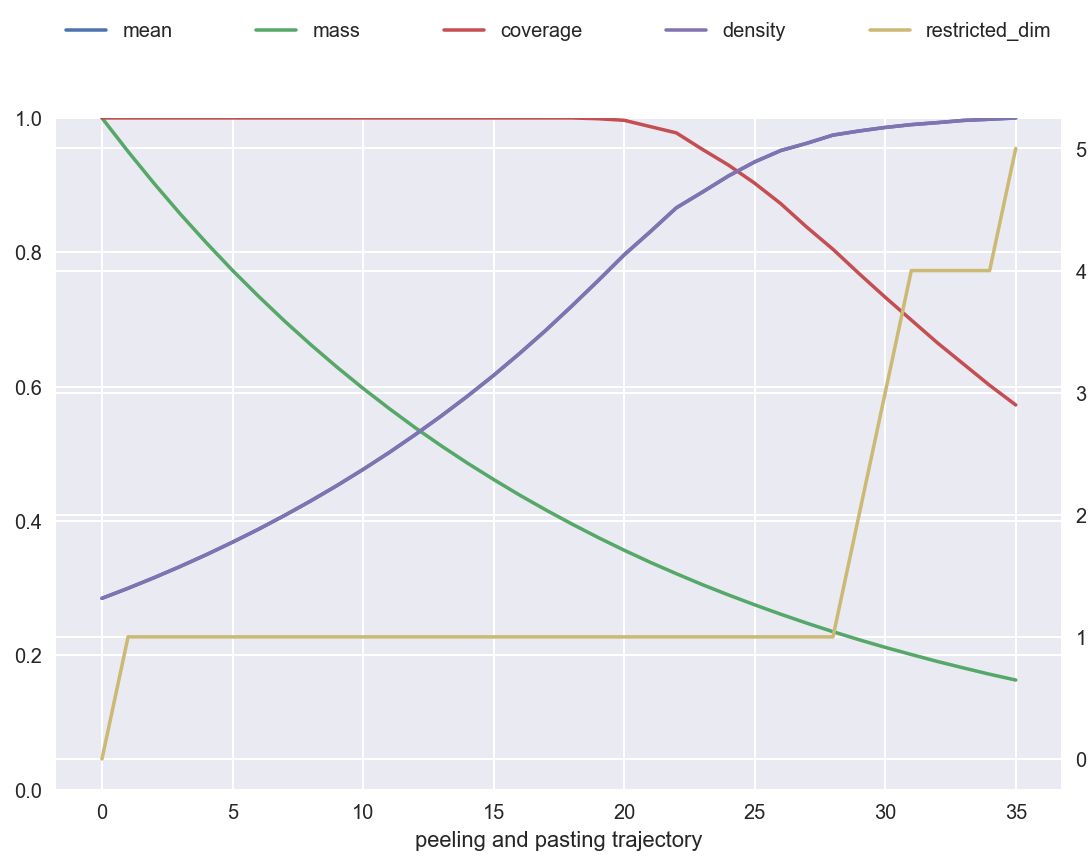

In [10]:
box1.show_ppt()
plt.show()

coverage    0.5726
density     1.0000
mass        0.1630
mean        1.0000
res dim     5.0000
Name: 35, dtype: float64

                                                       box 35              \
                                                          min         max   
Basic reproduction number                            4.044338    4.999969   
Base Societal Stress Coefficient Social Distanc...   0.322753    0.778417   
Average incubation time                              0.501261   13.083725   
Implementation Time Voluntary Immunization          37.038286  179.978221   
Base Effort Coefficient Social Distance III          4.000066    7.822240   

                                                                   
                                                        qp values  
Basic reproduction number                           3.824929e-263  
Base Societal Stress Coefficient Social Distanc...   1.103212e-02  
Average incubation time                              5.744813e-02  

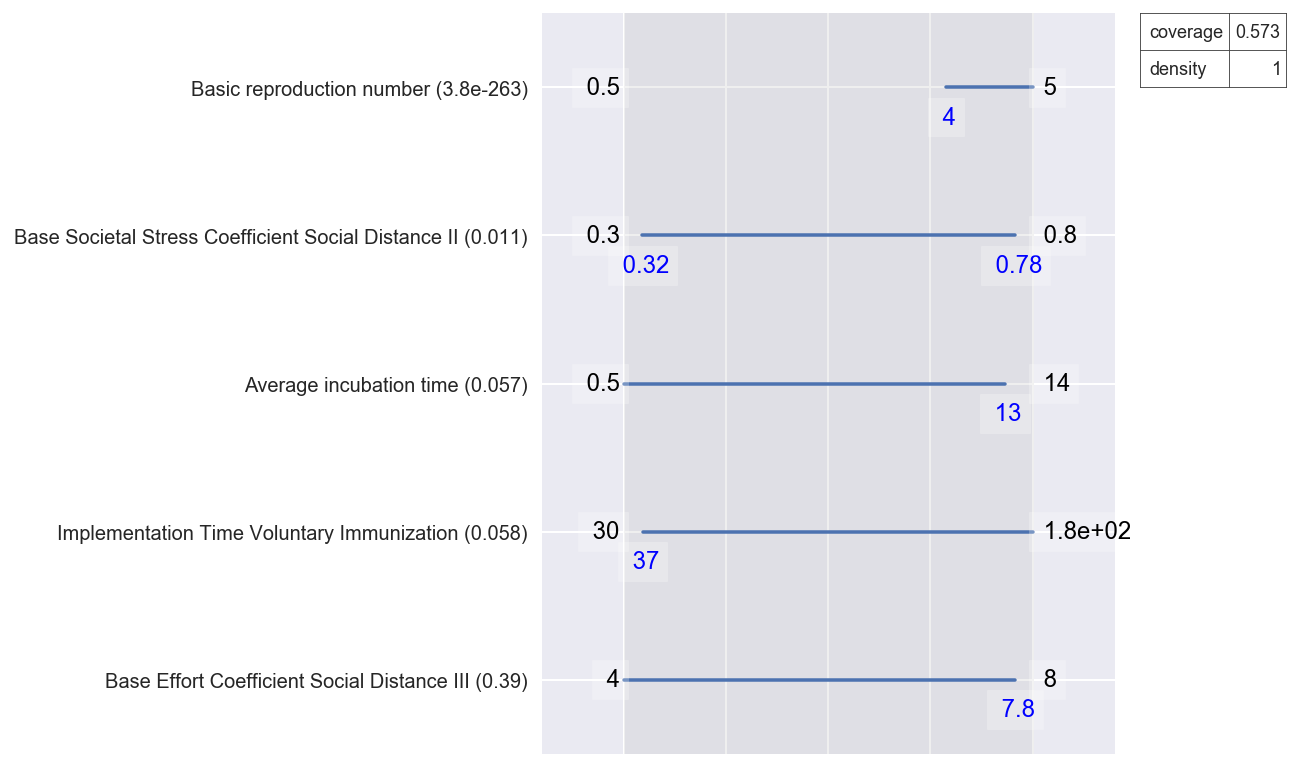

In [11]:
top_box = 35

box1.inspect(top_box)
box1.inspect(top_box, style='graph')

# there are problems with this when you run PRIM multiple 
# times in the same script 

# box1.select(top_box)
# fig = box1.show_pairs_scatter()
# fig.set_size_inches((12,12))
# plt.show()

In [21]:
box2 = infectious_prim.find_box()

[MainProcess/INFO] 2511 points remaining, containing 365 cases of interest
[MainProcess/INFO] mean: 0.9882352941176471, mass: 0.056666666666666664, coverage: 0.19672131147540983, density: 0.9882352941176471 restricted_dimensions: 7.0


In [22]:
box3 = infectious_prim.find_box()

[MainProcess/INFO] 2341 points remaining, containing 197 cases of interest
[MainProcess/INFO] box does not meet threshold criteria, value is 0.7834394904458599, returning dump box


In [23]:
ICD.display(infectious_prim.boxes_to_dataframe())
ICD.display(infectious_prim.stats_to_dataframe())

box 1            \
                                                         min       max   
Basic reproduction number                            4.04434   4.99997   
Base Societal Stress Coefficient Social Distanc...  0.322753  0.778417   
Average incubation time                             0.501261   13.0837   
Implementation Time Voluntary Immunization           37.0383   179.978   
Base Effort Coefficient Social Distance III          4.00007   7.82224   
Base Transmission Coefficient Social Distance II        0.89  0.959977   
Base Effort Coefficient Involuntary Immunization     5.00107   9.99962   
Average infectious period                            7.00312    20.998   
Base Effort Coefficient Public Info                  1.00007   1.99976   
Base Recovery Coefficient Medical Care I            0.970006  0.999992   

                                                       box 2            \
                                                         min       max   
Basic reproduction number                            3.85266   4.99997   
Base Societal Stress Coefficient Social Distanc...   0.30009  0.799844   
Average incubation time                             0.501261    13.997   
Implementation Time Voluntary Immunization           33.0239   179.978   
Base Effort Coefficient Social Distance III          4.00007   7.99947   
Base Transmission Coefficient Social Distance II    0.898019  0.959977   
Base Effort Coefficient Involuntary Immunization     5.00107   9.76639   
Average infectious period                            7.00312   19.0124   
Base Effort Coefficient Public Info                  1.05904   1.99976   
Base Recovery Coefficient Medical Care I            0.971471  0.999992   

                                                       box 3            
                                                         min       max  
Basic reproduction number                           0.501036   4.99997  
Base Societal Stress Coefficient Social Distanc...   0.30009  0.799844  
Average incubation time                             0.501261    13.997  
Implementation Time Voluntary Immunization           30.0165   179.978  
Base Effort Coefficient Social Distance III          4.00007   7.99947  
Base Transmission Coefficient Social Distance II        0.89  0.959977  
Base Effort Coefficient Involuntary Immunization     5.00107   9.99962  
Average infectious period                            7.00312    20.998  
Base Effort Coefficient Public Info                  1.00007   1.99976  
Base Recovery Coefficient Medical Care I            0.970006  0.999992

,coverage,density,mass,res_dim
box 1,0.572600,1.000000,0.163000,5.0
box 2,0.196721,0.988235,0.056667,7.0
box 3,0.230679,0.084152,0.780333,0.0


Box 1 indicates that the designed policy pathway has significant impact on the `Basic reproduction number`, reducing the relevant uncertainty range significantly, indicating that our policy effective for a large portion of the targeted uncertainty range. 

# Combination Analysis

In [12]:
def classifyBoth(data):
    ooi_d = 'Deceased population'
    result_d = data[ooi_d]
    
    ooi_i = 'Infectious population'
    result_i = np.max(data[ooi_i], axis=1)
    
    #make an empty array of length equal to number of cases 
    classes = np.zeros(result_d.shape[0])
    
    #combine infectious and deceased checks
    classes[(result_d[:, -1] > deceased_max*population) 
            & (result_i > infectious_max*population)] = 1
    
    return classes

combo_prim = prim.setup_prim(results, classifyBoth,  
                           threshold=0.8, threshold_type=1)
box1 = combo_prim.find_box()

[MainProcess/INFO] 3000 points remaining, containing 646 cases of interest
[MainProcess/INFO] mean: 1.0, mass: 0.12566666666666668, coverage: 0.5835913312693498, density: 1.0 restricted_dimensions: 5.0


box 1          
                                                 min       max
Basic reproduction number                    4.04734   4.99997
Case fatality rate                          0.159577  0.499887
Average incubation time                     0.501261   13.0885
Average infectious period                    7.00312   20.2386
Implementation Time Voluntary Immunization   37.6552   179.978

,coverage,density,mass,res_dim
box 1,0.583591,1.0,0.125667,5.0


In [13]:
box1.show_tradeoff()
mpld3.display()

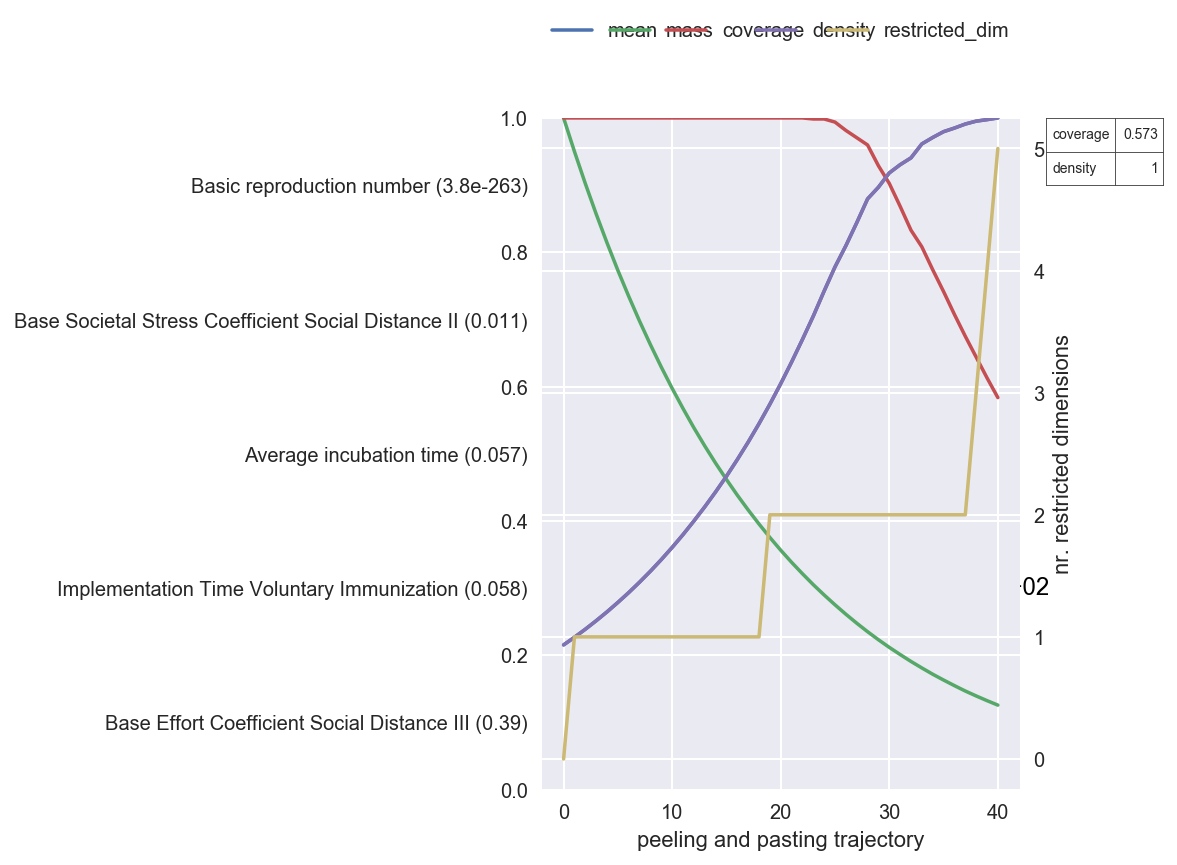

In [14]:
box1.show_ppt()
plt.show()

coverage    0.583591
density     1.000000
mass        0.125667
mean        1.000000
res dim     5.000000
Name: 40, dtype: float64

                                               box 40              \
                                                  min         max   
Basic reproduction number                    4.047339    4.999969   
Case fatality rate                           0.159577    0.499887   
Implementation Time Voluntary Immunization  37.655161  179.978221   
Average incubation time                      0.501261   13.088520   
Average infectious period                    7.003117   20.238607   

                                                           
                                                qp values  
Basic reproduction number                   3.553862e-194  
Case fatality rate                           2.439163e-48  
Implementation Time Voluntary Immunization   1.496811e-01  
Average incubation time                      3.845657e-01  
Average infectious period

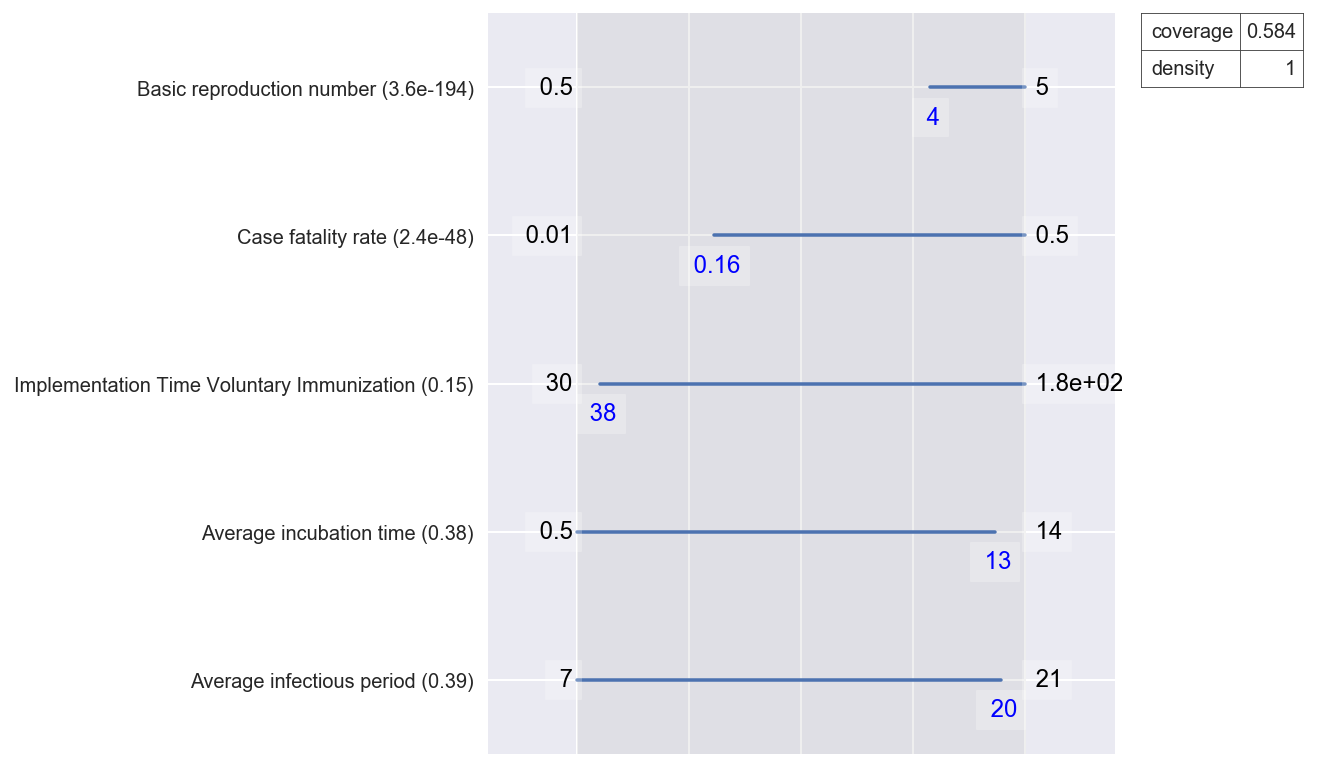

In [24]:
top_box = 40

box1.inspect(top_box)
box1.inspect(top_box, style='graph')

# there are problems with this when you run PRIM multiple 
# times in the same script 

# box1.select(top_box)
# fig = box1.show_pairs_scatter()
# fig.set_size_inches((12,12))
# plt.show()

In [25]:
box2 = combo_prim.find_box()

[MainProcess/INFO] 2623 points remaining, containing 269 cases of interest
[MainProcess/INFO] mean: 0.9281437125748503, mass: 0.05566666666666667, coverage: 0.23993808049535603, density: 0.9281437125748503 restricted_dimensions: 11.0


In [26]:
box3 = combo_prim.find_box()

[MainProcess/INFO] 2456 points remaining, containing 114 cases of interest
[MainProcess/INFO] box does not meet threshold criteria, value is 0.5935483870967742, returning dump box


In [27]:
ICD.display(infectious_prim.boxes_to_dataframe())
ICD.display(infectious_prim.stats_to_dataframe())

box 1            \
                                                         min       max   
Basic reproduction number                            4.04434   4.99997   
Base Societal Stress Coefficient Social Distanc...  0.322753  0.778417   
Average incubation time                             0.501261   13.0837   
Implementation Time Voluntary Immunization           37.0383   179.978   
Base Effort Coefficient Social Distance III          4.00007   7.82224   
Base Transmission Coefficient Social Distance II        0.89  0.959977   
Base Effort Coefficient Involuntary Immunization     5.00107   9.99962   
Average infectious period                            7.00312    20.998   
Base Effort Coefficient Public Info                  1.00007   1.99976   
Base Recovery Coefficient Medical Care I            0.970006  0.999992   

                                                       box 2            \
                                                         min       max   
Basic reproduction number                            3.85266   4.99997   
Base Societal Stress Coefficient Social Distanc...   0.30009  0.799844   
Average incubation time                             0.501261    13.997   
Implementation Time Voluntary Immunization           33.0239   179.978   
Base Effort Coefficient Social Distance III          4.00007   7.99947   
Base Transmission Coefficient Social Distance II    0.898019  0.959977   
Base Effort Coefficient Involuntary Immunization     5.00107   9.76639   
Average infectious period                            7.00312   19.0124   
Base Effort Coefficient Public Info                  1.05904   1.99976   
Base Recovery Coefficient Medical Care I            0.971471  0.999992   

                                                       box 3            
                                                         min       max  
Basic reproduction number                           0.501036   4.99997  
Base Societal Stress Coefficient Social Distanc...   0.30009  0.799844  
Average incubation time                             0.501261    13.997  
Implementation Time Voluntary Immunization           30.0165   179.978  
Base Effort Coefficient Social Distance III          4.00007   7.99947  
Base Transmission Coefficient Social Distance II        0.89  0.959977  
Base Effort Coefficient Involuntary Immunization     5.00107   9.99962  
Average infectious period                            7.00312    20.998  
Base Effort Coefficient Public Info                  1.00007   1.99976  
Base Recovery Coefficient Medical Care I            0.970006  0.999992

,coverage,density,mass,res_dim
box 1,0.572600,1.000000,0.163000,5.0
box 2,0.196721,0.988235,0.056667,7.0
box 3,0.230679,0.084152,0.780333,0.0


Similar effects can be seen on the `Basic reproduction number` target uncertainty space in the combination set as the previous two cases.

# CART

For another set of data points, we also ran a CART analysis over the `Deceased population` outcome. Performing scenario discovery with CART and similar input levels allows us to confirm findings through a second methodology. 

,coverage,density,mass,res dim
box 1,0.000000,0.000000,0.331000,1
box 2,0.005195,0.035088,0.057000,1
box 3,0.037229,0.218274,0.065667,1
box 4,0.000000,0.000000,0.107333,2
box 5,0.017316,0.133333,0.050000,2
box 6,0.093506,0.675000,0.053333,2
box 7,0.118615,0.845679,0.054000,2
box 8,0.601732,1.000000,0.231667,3
box 9,0.126407,0.973333,0.050000,3


box 1                box 2            \
                                 min       max        min       max   
Basic reproduction number   0.501036   1.98957    1.98957   2.24602   
Average infectious period    7.00312    20.998    7.00312    20.998   
Case fatality rate         0.0101097  0.499887  0.0101097  0.499887   

                               box 3                box 4               box 5  \
                                 min       max        min       max       min   
Basic reproduction number    2.24602   2.54142    2.54142   4.99997   2.54142   
Average infectious period    7.00312    20.998    7.00312    20.998   7.00312   
Case fatality rate         0.0101097  0.499887  0.0101097  0.106715  0.106715   

                                        box 6               box 7            \
                                max       min       max       min       max   
Basic reproduction number   4.99997   2.54142     2.895     2.895   4.99997   
Average infectious period    20.998   7.00312    20.998   7.00312    20.998   
Case fatality rate         0.152362  0.152362  0.499887  0.152362  0.211268   

                              box 8               box 9            
                                min       max       min       max  
Basic reproduction number     2.895   4.99997     2.895   4.99997  
Average infectious period   7.00312   18.6666   18.6666    20.998  
Case fatality rate         0.211268  0.499887  0.211268  0.499887

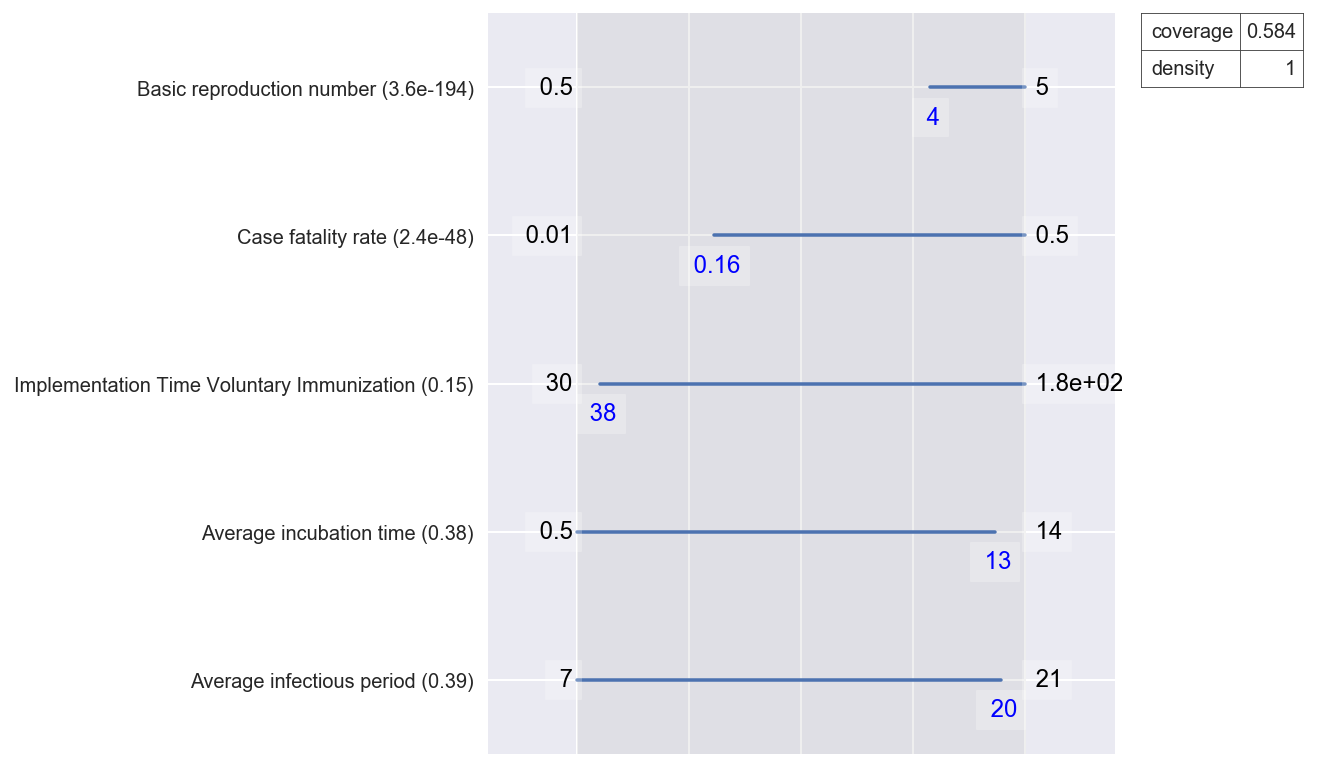

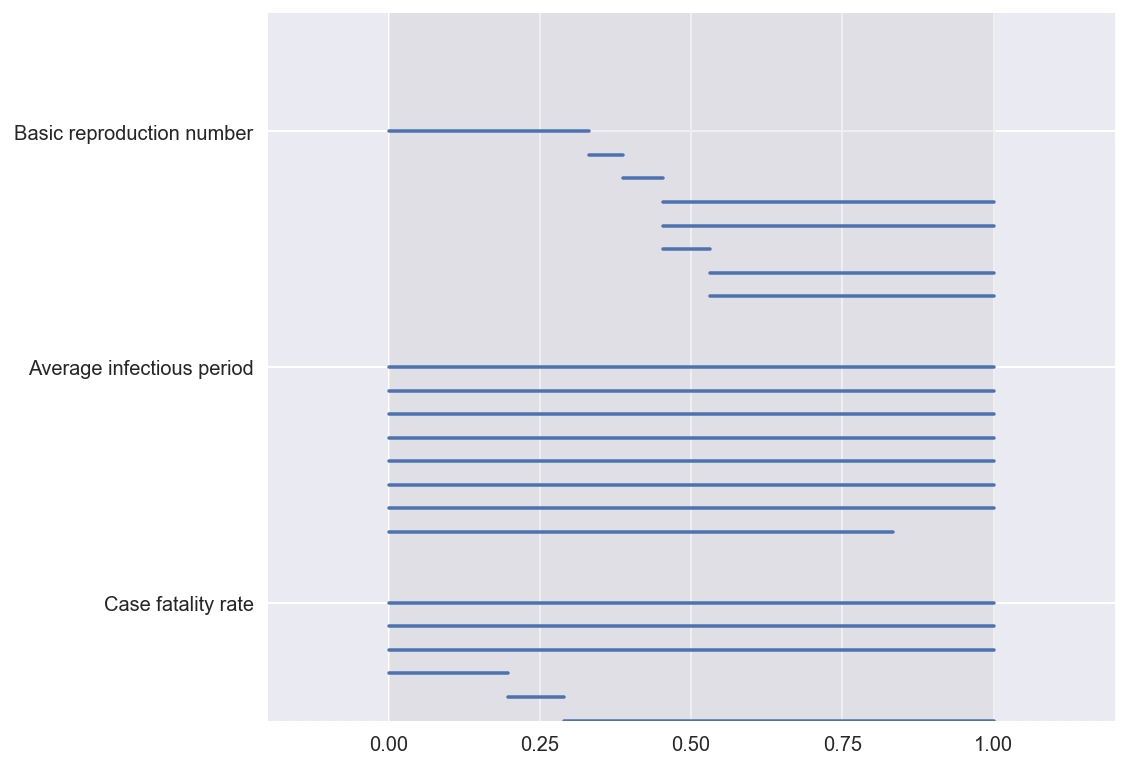

In [28]:
cart_deceased = cart.setup_cart(results, classifyDeceased, mass_min=0.05)
cart_deceased.build_tree()

ICD.display(cart_deceased.stats_to_dataframe())
ICD.display(cart_deceased.boxes_to_dataframe())

cart_deceased.display_boxes(together=True)
plt.show()

In [29]:
cart_infectious = cart.setup_cart(results, classifyInfectious, mass_min=0.05)
cart_infectious.build_tree()

ICD.display(cart_infectious.stats_to_dataframe())
ICD.display(cart_infectious.boxes_to_dataframe())

# there are problems with this when you run CART multiple 
# times in the same script 

#cart_infectious.display_boxes(together=True)
#plt.show()

,coverage,density,mass,res dim
box 1,0.000000,0.000000,0.602667,1
box 2,0.005855,0.033333,0.050000,1
box 3,0.064403,0.303867,0.060333,1
box 4,0.124122,0.683871,0.051667,1
box 5,0.158080,0.888158,0.050667,1
box 6,0.174473,0.993333,0.050000,2
box 7,0.473068,1.000000,0.134667,2


box 1             \
                                                        min        max   
Basic reproduction number                          0.501036    3.21195   
Base Societal Stress Coefficient Medical Care II  0.0500101  0.0999904   

                                                      box 2             \
                                                        min        max   
Basic reproduction number                           3.21195    3.43712   
Base Societal Stress Coefficient Medical Care II  0.0500101  0.0999904   

                                                      box 3             \
                                                        min        max   
Basic reproduction number                           3.43712    3.70845   
Base Societal Stress Coefficient Medical Care II  0.0500101  0.0999904   

                                                      box 4             \
                                                        min        max   
Basic reproduction number                           3.70845     3.9415   
Base Societal Stress Coefficient Medical Care II  0.0500101  0.0999904   

                                                      box 5             \
                                                        min        max   
Basic reproduction number                            3.9415    4.16922   
Base Societal Stress Coefficient Medical Care II  0.0500101  0.0999904   

                                                      box 6             \
                                                        min        max   
Basic reproduction number                           4.16922    4.99997   
Base Societal Stress Coefficient Medical Care II  0.0500101  0.0639474   

                                                      box 7             
                                                        min        max  
Basic reproduction number                           4.16922    4.99997  
Base Societal Stress Coefficient Medical Care II  0.0639474  0.0999904

In [30]:
cart_both = cart.setup_cart(results, classifyBoth, mass_min=0.05)
cart_both.build_tree()

ICD.display(cart_both.stats_to_dataframe())
ICD.display(cart_both.boxes_to_dataframe())

# there are problems with this when you run CART multiple 
# times in the same script 

#cart_both.display_boxes(together=True)
#plt.show()

,coverage,density,mass,res dim
box 1,0.000000,0.000000,0.586333,1
box 2,0.003096,0.013333,0.050000,1
box 3,0.029412,0.126667,0.050000,1
box 4,0.007740,0.020747,0.080333,2
box 5,0.143963,0.620000,0.050000,2
box 6,0.218266,0.886792,0.053000,2
box 7,0.224458,0.966667,0.050000,2
box 8,0.373065,1.000000,0.080333,2


box 1                box 2            \
                                 min       max        min       max   
Basic reproduction number   0.501036   3.13822    3.13822   3.36376   
Case fatality rate         0.0101097  0.499887  0.0101097  0.499887   

                               box 3                box 4               box 5  \
                                 min       max        min       max       min   
Basic reproduction number    3.36376   3.58886    3.58886   4.99997   3.58886   
Case fatality rate         0.0101097  0.499887  0.0101097  0.139837  0.139837   

                                        box 6               box 7            \
                                max       min       max       min       max   
Basic reproduction number   3.89271   3.89271   4.21371   4.21371   4.99997   
Case fatality rate         0.499887  0.139837  0.499887  0.139837  0.283049   

                              box 8            
                                min       max  
Basic reproduction number   4.21371   4.99997  
Case fatality rate         0.283049  0.499887

# Conclusion

Both PRIM and CART analysis have shown that the designed adaptive policy pathway has made a positive impact on reducing the uncertainty space for both `Basic reproduction number` and `Case fatality rate` that cause the `Infectious population` and `Deceased population` outputs to rise above the thresholds listed at the beginning of this script. 